In [226]:
# Import all the relevant libraries required for this case study.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

events_df = pd.read_csv("DS_events.csv" , low_memory=False)
events_df

,Column1,clock,defender_id,defenders,defending_all_out_points,defending_bonus_points,defending_capture_points,defending_points,defending_team_id,defending_technical_points,...,review.reason.id,review.reason.reason_value,review.review_taken,review.team_id,score,status_id,substituted_by,super_raid,super_tackle,team_id
0,0,0:33,NaN,NaN,NaN,NaN,NaN,0.0,5.0,NaN,...,NaN,NaN,NaN,NaN,"[0, 1]",0.0,NaN,NaN,NaN,NaN
1,1,0:43,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN,...,NaN,NaN,NaN,NaN,"[0, 1]",0.0,NaN,NaN,NaN,NaN
2,2,0:48,54.0,NaN,NaN,NaN,NaN,1.0,5.0,NaN,...,NaN,NaN,NaN,NaN,"[1, 2]",0.0,NaN,NaN,NaN,NaN
3,3,1:42,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,...,NaN,NaN,NaN,NaN,"[1, 3]",0.0,NaN,NaN,NaN,NaN
4,4,2:19,NaN,NaN,NaN,NaN,NaN,0.0,5.0,NaN,...,NaN,NaN,NaN,NaN,"[1, 3]",0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66563,89,38:08,NaN,NaN,NaN,NaN,NaN,0.0,5.0,NaN,...,NaN,NaN,NaN,NaN,"[30, 15]",NaN,NaN,NaN,NaN,NaN
66564,90,38:38,NaN,NaN,NaN,NaN,NaN,0.0,4.0,NaN,...,NaN,NaN,NaN,NaN,"[30, 15]",NaN,NaN,NaN,NaN,NaN
66565,91,39:03,NaN,NaN,NaN,NaN,NaN,0.0,5.0,NaN,...,NaN,NaN,NaN,NaN,"[30, 16]",NaN,NaN,NaN,NaN,NaN
66566,92,39:41,108.0,NaN,NaN,NaN,NaN,1.0,4.0,NaN,...,NaN,NaN,NaN,NaN,"[30, 17]",NaN,NaN,NaN,NaN,NaN


In [227]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66568 entries, 0 to 66567
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Column1                       66568 non-null  int64  
 1   clock                         66568 non-null  object 
 2   defender_id                   14055 non-null  float64
 3   defenders                     0 non-null      float64
 4   defending_all_out_points      19799 non-null  float64
 5   defending_bonus_points        19799 non-null  float64
 6   defending_capture_points      19799 non-null  float64
 7   defending_points              58315 non-null  float64
 8   defending_team_id             58315 non-null  float64
 9   defending_technical_points    19799 non-null  float64
 10  do_or_die                     20297 non-null  object 
 11  event                         66568 non-null  object 
 12  event_id                      66568 non-null  int64  
 13  e

In [228]:
match_df = pd.read_csv('DS_match.csv' , low_memory=False)
match_df

,Unnamed: 0,match_id,match_number,date,start_time,result,player_id_of_the_match,player_name_of_the_match,series_id,series_name,status,toss_winner,toss_selection,venue_id,venue_name,home_team_id,home_team_name
0,0,1,Match 1,7/26/2014,20:00,U Mumba beat Jaipur Pink Panthers (45 - 31),29.0,29.0,1,"Pro Kabaddi League Season 1, 2014",Full Time,5,Choice of court : Right,5,"DOME@NSCI SVP Stadium, Mumbai",5.0,U Mumba
1,1,10,Match 10,7/31/2014,21:00,Bengal Warriors beat Dabang Delhi (42 - 40),12.0,12.0,1,"Pro Kabaddi League Season 1, 2014",Full Time,2,Choice of court : Left,4,"Netaji Subhash Chandra Bose Indoor Stadium, Ko...",4.0,Bengal Warriors
2,2,100,Match 39,8/9/2015,21:00,Dabang Delhi beat Patna Pirates (45-26),58.0,58.0,2,"Pro Kabaddi League, 2015",Full Time,6,Choice of court :Left,2,"Thyagaraj Sports Complex, Delhi",NaN,NaN
3,3,101,Match 40,8/10/2015,20:00,Jaipur Pink Panthers beat Dabang Delhi (51-21),NaN,NaN,2,"Pro Kabaddi League, 2015",Full Time,3,Choice of court :Left,2,"Thyagaraj Sports Complex, Delhi",NaN,NaN
4,4,102,Match 41,8/11/2015,20:00,Jaipur Pink Panthers beat Puneri Paltan (31-18),86.0,86.0,2,"Pro Kabaddi League, 2015",Full Time,7,Choice of court :Left,2,"Thyagaraj Sports Complex, Delhi",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,679,95,Match 34,8/7/2015,20:00,Jaipur Pink Panthers beat U Mumba (35-25),190.0,190.0,2,"Pro Kabaddi League, 2015",Full Time,5,Choice of court :Left,9,"Gachibowli Indoor Stadium, Hyderabad",NaN,NaN
680,680,96,Match 35,8/7/2015,21:00,Match Tied,124.0,124.0,2,"Pro Kabaddi League, 2015",Full Time,7,Choice of court :Left,9,"Gachibowli Indoor Stadium, Hyderabad",NaN,NaN
681,681,97,Match 36,8/8/2015,20:00,Bengal Warriors beat Dabang Delhi (20-17),58.0,58.0,2,"Pro Kabaddi League, 2015",Full Time,4,Choice of court :Left,2,"Thyagaraj Sports Complex, Delhi",NaN,NaN
682,682,98,Match 37,8/8/2015,21:00,Patna Pirates beat Bengaluru Bulls (30-28),69.0,69.0,2,"Pro Kabaddi League, 2015",Full Time,6,Choice of court :Right,2,"Thyagaraj Sports Complex, Delhi",NaN,NaN


In [229]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                684 non-null    int64  
 1   match_id                  684 non-null    int64  
 2   match_number              684 non-null    object 
 3   date                      684 non-null    object 
 4   start_time                684 non-null    object 
 5   result                    679 non-null    object 
 6   player_id_of_the_match    575 non-null    float64
 7   player_name_of_the_match  575 non-null    float64
 8   series_id                 684 non-null    int64  
 9   series_name               684 non-null    object 
 10  status                    684 non-null    object 
 11  toss_winner               684 non-null    int64  
 12  toss_selection            684 non-null    object 
 13  venue_id                  684 non-null    int64  
 14  venue_name

In [230]:
players_df = pd.read_csv('DS_players.csv', low_memory=False)
players_df

,Unnamed: 0,index,player_id,player_name,player_short_name,player_skill,player_role,player_red_card,player_yellow_card,player_green_card,...,player_tackle_points_capture_bonus,player_raids_total,player_raids_successful,player_raids_unsuccessful,player_raids_Empty,player_tackles_total,player_tackles_successful,player_tackles_unsuccessful,match_id,team_id
0,0,0,15,Sanjay Shrestha,Sanjay Shrestha,NaN,NaN,False,False,False,...,0,0,0,0,0,0,0,0,1,3
1,0,0,96,Rohit Rana,Rohit Rana,NaN,NaN,False,False,False,...,0,1,0,0,1,0,0,0,1,3
2,0,0,72,Navneet Gautam,Navneet Gautam,NaN,NaN,False,False,False,...,0,1,0,0,1,0,0,0,1,3
3,0,0,52,Jasvir Singh,Jasvir Singh,NaN,NaN,False,False,False,...,1,12,7,3,2,10,3,7,1,3
4,0,0,22,Wei Yang,Wei Yang,NaN,NaN,False,False,False,...,0,0,0,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16887,0,0,13,Seong Ryeol Kim,NaN,NaN,NaN,False,False,False,...,0,0,0,0,0,0,0,0,99,4
16888,0,0,108,Shyam Kumar Sah,NaN,NaN,NaN,False,False,False,...,0,1,0,0,1,6,3,3,99,4
16889,0,0,179,Vikas Kale,NaN,NaN,NaN,False,False,False,...,0,0,0,0,0,2,0,2,99,4
16890,0,0,180,Kedar Lal,NaN,NaN,NaN,False,False,False,...,0,10,3,2,5,0,0,0,99,4


In [231]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16892 entries, 0 to 16891
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          16892 non-null  int64  
 1   index                               16892 non-null  int64  
 2   player_id                           16892 non-null  int64  
 3   player_name                         16892 non-null  object 
 4   player_short_name                   1698 non-null   object 
 5   player_skill                        0 non-null      float64
 6   player_role                         0 non-null      float64
 7   player_red_card                     16892 non-null  bool   
 8   player_yellow_card                  16892 non-null  bool   
 9   player_green_card                   16892 non-null  bool   
 10  player_jersey                       16892 non-null  int64  
 11  player_played                       16892

In [232]:
team_df = pd.read_csv('DS_team.csv')
team_df

,Unnamed: 0,id,match_id,name,score,short_name,squad,state_of_play,state_of_play.is_raiding_now,state_of_play.last_raid.id,...,stats.points.total,stats.raids.Empty,stats.raids.successful,stats.raids.super_raids,stats.raids.total,stats.raids.unsuccessful,stats.tackles.successful,stats.tackles.super_tackles,stats.tackles.total,stats.tackles.unsuccessful
0,0,3,1,Jaipur Pink Panthers,28,JAI,"[{'id': 15, 'name': 'Sanjay Shrestha', 'short_...",NaN,False,0.0,...,28,10,20,NaN,40,10,1,NaN,24,23
1,1,5,1,U Mumba,44,MUM,"[{'id': 54, 'name': 'Jeeva Kumar', 'short_name...",NaN,False,0.0,...,44,15,21,NaN,40,4,10,NaN,32,22
2,0,2,10,Dabang Delhi K.C.,39,DEL,"[{'id': 4, 'name': 'Ehsan Zamani Fard', 'short...",NaN,False,0.0,...,39,8,24,NaN,44,12,8,NaN,27,19
3,1,4,10,Bengal Warriors,40,KOL,"[{'id': 5, 'name': 'Farhad Kamal Gharibi', 'sh...",NaN,False,0.0,...,40,20,16,NaN,45,9,11,NaN,32,21
4,0,2,100,Dabang Delhi,45,DEL,"[{'id': 58, 'name': 'Kashiling Adake', 'short_...",NaN,NaN,NaN,...,45,25,13,NaN,45,7,13,NaN,25,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,1,4,97,Bengal Warriors,20,KOL,"[{'id': 163, 'name': 'Mahendra Ganesh Rajput',...",NaN,NaN,NaN,...,20,26,7,NaN,41,8,10,NaN,17,7
1364,0,6,98,Patna Pirates,30,PAT,"[{'id': 142, 'name': 'Sandeep Narwal', 'short_...",NaN,NaN,NaN,...,30,24,9,NaN,42,9,13,NaN,27,14
1365,1,1,98,Bengaluru Bulls,28,BEN,"[{'id': 195, 'name': 'Ashish Chhokar', 'short_...",NaN,NaN,NaN,...,28,14,15,NaN,43,14,5,NaN,12,7
1366,0,5,99,U Mumba,31,MUM,"[{'id': 34, 'name': 'Bhupender Singh', 'short_...",NaN,NaN,NaN,...,31,21,15,NaN,41,5,8,NaN,16,8


In [233]:
team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                1368 non-null   int64  
 1   id                                        1368 non-null   int64  
 2   match_id                                  1368 non-null   int64  
 3   name                                      1368 non-null   object 
 4   score                                     1368 non-null   int64  
 5   short_name                                1368 non-null   object 
 6   squad                                     1368 non-null   object 
 7   state_of_play                             0 non-null      float64
 8   state_of_play.is_raiding_now              596 non-null    object 
 9   state_of_play.last_raid.id                596 non-null    float64
 10  state_of_play.last_raid.result      

In [234]:
events_df.head()

,Column1,clock,defender_id,defenders,defending_all_out_points,defending_bonus_points,defending_capture_points,defending_points,defending_team_id,defending_technical_points,...,review.reason.id,review.reason.reason_value,review.review_taken,review.team_id,score,status_id,substituted_by,super_raid,super_tackle,team_id
0,0,0:33,NaN,NaN,NaN,NaN,NaN,0.0,5.0,NaN,...,NaN,NaN,NaN,NaN,"[0, 1]",0.0,NaN,NaN,NaN,NaN
1,1,0:43,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN,...,NaN,NaN,NaN,NaN,"[0, 1]",0.0,NaN,NaN,NaN,NaN
2,2,0:48,54.0,NaN,NaN,NaN,NaN,1.0,5.0,NaN,...,NaN,NaN,NaN,NaN,"[1, 2]",0.0,NaN,NaN,NaN,NaN
3,3,1:42,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,...,NaN,NaN,NaN,NaN,"[1, 3]",0.0,NaN,NaN,NaN,NaN
4,4,2:19,NaN,NaN,NaN,NaN,NaN,0.0,5.0,NaN,...,NaN,NaN,NaN,NaN,"[1, 3]",0.0,NaN,NaN,NaN,NaN


In [235]:
events_df.tail()

,Column1,clock,defender_id,defenders,defending_all_out_points,defending_bonus_points,defending_capture_points,defending_points,defending_team_id,defending_technical_points,...,review.reason.id,review.reason.reason_value,review.review_taken,review.team_id,score,status_id,substituted_by,super_raid,super_tackle,team_id
66563,89,38:08,NaN,NaN,NaN,NaN,NaN,0.0,5.0,NaN,...,NaN,NaN,NaN,NaN,"[30, 15]",NaN,NaN,NaN,NaN,NaN
66564,90,38:38,NaN,NaN,NaN,NaN,NaN,0.0,4.0,NaN,...,NaN,NaN,NaN,NaN,"[30, 15]",NaN,NaN,NaN,NaN,NaN
66565,91,39:03,NaN,NaN,NaN,NaN,NaN,0.0,5.0,NaN,...,NaN,NaN,NaN,NaN,"[30, 16]",NaN,NaN,NaN,NaN,NaN
66566,92,39:41,108.0,NaN,NaN,NaN,NaN,1.0,4.0,NaN,...,NaN,NaN,NaN,NaN,"[30, 17]",NaN,NaN,NaN,NaN,NaN
66567,93,39:49,71.0,NaN,NaN,NaN,NaN,1.0,5.0,NaN,...,NaN,NaN,NaN,NaN,"[31, 17]",NaN,NaN,NaN,NaN,NaN


In [236]:
events_df.sample(5, random_state = 42)

,Column1,clock,defender_id,defenders,defending_all_out_points,defending_bonus_points,defending_capture_points,defending_points,defending_team_id,defending_technical_points,...,review.reason.id,review.reason.reason_value,review.review_taken,review.team_id,score,status_id,substituted_by,super_raid,super_tackle,team_id
34879,27,07:36,NaN,NaN,NaN,NaN,NaN,1.0,5.0,NaN,...,NaN,NaN,NaN,NaN,"[10, 7]",0.0,NaN,NaN,NaN,NaN
30317,71,12:03,357.0,NaN,NaN,NaN,NaN,1.0,31.0,NaN,...,NaN,NaN,NaN,NaN,"[21, 13]",0.0,NaN,NaN,NaN,NaN
18442,99,39:37,160.0,NaN,NaN,NaN,NaN,1.0,3.0,NaN,...,NaN,NaN,NaN,NaN,"[34, 33]",NaN,NaN,NaN,NaN,NaN
2731,88,35:59,NaN,NaN,NaN,NaN,NaN,0.0,6.0,NaN,...,NaN,NaN,NaN,NaN,"[21, 27]",NaN,NaN,NaN,NaN,NaN
16929,63,10:14,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,...,NaN,NaN,False,0.0,"[17, 27]",3.0,NaN,False,False,NaN


In [237]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66568 entries, 0 to 66567
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Column1                       66568 non-null  int64  
 1   clock                         66568 non-null  object 
 2   defender_id                   14055 non-null  float64
 3   defenders                     0 non-null      float64
 4   defending_all_out_points      19799 non-null  float64
 5   defending_bonus_points        19799 non-null  float64
 6   defending_capture_points      19799 non-null  float64
 7   defending_points              58315 non-null  float64
 8   defending_team_id             58315 non-null  float64
 9   defending_technical_points    19799 non-null  float64
 10  do_or_die                     20297 non-null  object 
 11  event                         66568 non-null  object 
 12  event_id                      66568 non-null  int64  
 13  e

In [238]:
events_df.dtypes

Column1                           int64
clock                            object
defender_id                     float64
defenders                       float64
defending_all_out_points        float64
defending_bonus_points          float64
defending_capture_points        float64
defending_points                float64
defending_team_id               float64
defending_technical_points      float64
do_or_die                        object
event                            object
event_id                          int64
event_no                          int64
event_text                       object
match_id                          int64
player_id                       float64
raid_all_out_points             float64
raid_bonus_points               float64
raid_points                     float64
raid_technical_points           float64
raid_touch_points               float64
raider_bonus                    float64
raider_id                       float64
raiding_team_id                 float64


In [239]:
events_df['event'].value_counts()

event
Empty Raid                   24951
Successful Raid              20218
Unsuccessful Raid            13119
Substitution                  4733
TimeOut                       2588
Green Card                     657
Non Raid Technical Points      224
Yellow Card                     48
Raider and Anti Out             27
Red Card                         3
Name: count, dtype: int64

In [240]:
events_df[events_df['event'] == 'Substitution'][['clock' , 'event' , 'event_text' , 'match_id' , 'player_id']]

,clock,event,event_text,match_id,player_id
34,16:4,Substitution,Gangadhari Mallesh comes in for Prashant Chavan,1,147.0
45,20:0,Substitution,Balbir Singh comes in for Gangadhari Mallesh,1,44.0
58,25:1,Substitution,Gangadhari Mallesh comes in for Gokul Shitole,1,144.0
205,07:10,Substitution,Varinder Singh comes in for Vijay Malik,100,208.0
207,07:29,Substitution,Vijay Malik comes in for Varinder Singh,100,260.0
...,...,...,...,...,...
66521,21:02,Substitution,Deepak Kumar comes in for Kedar Lal,99,184.0
66528,24:03,Substitution,Bajirao Hodage comes in for Vikas Kale,99,164.0
66533,26:01,Substitution,Vineet Sharma comes in for Jang Kun Lee,99,268.0
66544,31:05,Substitution,Mahendra Ganesh Rajput comes in for Deepak Kumar,99,163.0


In [241]:
events_df[events_df['event']=='Successful Raid'][['clock','event','event_text','raid_points']]

,clock,event,event_text,raid_points
0,0:33,Successful Raid,Jasvir Singh Successful Raid,1.0
7,3:45,Successful Raid,Shabeer Bappu Successful Raid,2.0
8,3:45,Successful Raid,Shabeer Bappu Successful Raid,2.0
10,4:28,Successful Raid,Anup Kumar Successful Raid,1.0
11,5:19,Successful Raid,Jasvir Singh Successful Raid,2.0
...,...,...,...,...
66549,32:58,Successful Raid,Pradeep Kumar raids successfully,1.0
66556,36:00,Successful Raid,Bhupender Singh raids successfully,1.0
66559,36:44,Successful Raid,Anup Kumar raids successfully,3.0
66562,37:36,Successful Raid,Pradeep Kumar raids successfully,1.0


In [242]:
events_df[events_df['event']=='Unsuccessful Raid'][['clock','event','event_text','defending_points']]

,clock,event,event_text,defending_points
2,0:48,Unsuccessful Raid,Maninder Singh Unsuccessful Raid,1.0
3,1:42,Unsuccessful Raid,Anup Kumar Unsuccessful Raid,1.0
9,4:8,Unsuccessful Raid,Maninder Singh Unsuccessful Raid,1.0
15,7:5,Unsuccessful Raid,Anup Kumar Unsuccessful Raid,1.0
18,8:44,Unsuccessful Raid,Maninder Singh Unsuccessful Raid,1.0
...,...,...,...,...
66555,35:18,Unsuccessful Raid,Kedar Lal Unsuccessful Raid,1.0
66557,36:13,Unsuccessful Raid,Deepak Kumar Unsuccessful Raid,1.0
66561,37:23,Unsuccessful Raid,Kedar Lal Unsuccessful Raid,1.0
66566,39:41,Unsuccessful Raid,Bhupender Singh Unsuccessful Raid,1.0


In [243]:
events_df.shape

(66568, 41)

In [244]:
# Missing Values
events_df.isnull().sum().sort_values(ascending = False)

reason_id                       66568
defenders                       66568
review.outcome                  66568
review.reason                   66568
review.reason.reason_value      66125
review.reason.id                66125
review.outcome.id               66125
review.outcome.outcome_value    66125
raider_bonus                    66070
reason                          65646
substituted_by                  61835
player_id                       61127
team_id                         58318
defender_id                     52513
raid_touch_points               46769
review.review_taken             46769
review.team_id                  46769
super_raid                      46769
super_tackle                    46769
raid_technical_points           46769
raid_bonus_points               46769
raid_all_out_points             46769
defending_all_out_points        46769
defending_bonus_points          46769
defending_capture_points        46769
defending_technical_points      46769
do_or_die   

In [245]:
# Describe() -> Statistical Analysis
events_df.describe() # Numerical Only

,Column1,defender_id,defenders,defending_all_out_points,defending_bonus_points,defending_capture_points,defending_points,defending_team_id,defending_technical_points,event_id,...,raiding_team_id,reason_id,review.outcome,review.outcome.id,review.reason,review.reason.id,review.team_id,status_id,substituted_by,team_id
count,66568.000000,14055.000000,0.0,19799.000000,19799.000000,19799.000000,58315.000000,58315.000000,19799.000000,66568.000000,...,58315.000000,0.0,0.0,443.000000,0.0,443.000000,19799.000000,45112.000000,4733.000000,8250.000000
mean,48.710326,386.817645,NaN,0.028486,0.021112,0.218950,0.271885,14.574415,0.016617,2.607199,...,14.569682,NaN,NaN,1.641084,NaN,39.690745,0.464670,1.541231,619.011409,11.677212
std,28.798869,557.652491,NaN,0.236989,0.143762,0.413545,0.563008,31.458682,0.139547,1.714135,...,31.451141,NaN,NaN,0.480225,NaN,2.621971,7.246936,2.455353,772.152368,26.650550
min,0.000000,4.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,NaN,NaN,1.000000,NaN,37.000000,0.000000,0.000000,4.000000,0.000000
25%,24.000000,96.000000,NaN,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,...,3.000000,NaN,NaN,1.000000,NaN,37.000000,0.000000,0.000000,156.000000,1.000000
50%,48.000000,179.000000,NaN,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,2.000000,...,6.000000,NaN,NaN,2.000000,NaN,39.000000,0.000000,2.000000,293.000000,5.000000
75%,73.000000,401.000000,NaN,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,3.000000,...,16.000000,NaN,NaN,2.000000,NaN,43.000000,0.000000,3.000000,689.000000,9.000000
max,122.000000,2672.000000,NaN,2.000000,1.000000,1.000000,3.000000,243.000000,2.000000,11.000000,...,243.000000,NaN,NaN,2.000000,NaN,44.000000,243.000000,19.000000,2683.000000,243.000000


In [246]:
events_df.describe(include = 'all') # Categorical + Numerical

,Column1,clock,defender_id,defenders,defending_all_out_points,defending_bonus_points,defending_capture_points,defending_points,defending_team_id,defending_technical_points,...,review.reason.id,review.reason.reason_value,review.review_taken,review.team_id,score,status_id,substituted_by,super_raid,super_tackle,team_id
count,66568.000000,66568,14055.000000,0.0,19799.000000,19799.000000,19799.000000,58315.000000,58315.000000,19799.000000,...,443.000000,443,19799,19799.000000,59233,45112.000000,4733.000000,19799,19799,8250.000000
unique,NaN,3212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8,2,NaN,2438,NaN,NaN,2,2,NaN
top,NaN,19:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Touches,False,NaN,"[0, 0]",NaN,NaN,False,False,NaN
freq,NaN,303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,153,19356,NaN,795,NaN,NaN,19574,19350,NaN
mean,48.710326,NaN,386.817645,NaN,0.028486,0.021112,0.218950,0.271885,14.574415,0.016617,...,39.690745,NaN,NaN,0.464670,NaN,1.541231,619.011409,NaN,NaN,11.677212
std,28.798869,NaN,557.652491,NaN,0.236989,0.143762,0.413545,0.563008,31.458682,0.139547,...,2.621971,NaN,NaN,7.246936,NaN,2.455353,772.152368,NaN,NaN,26.650550
min,0.000000,NaN,4.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,37.000000,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,0.000000
25%,24.000000,NaN,96.000000,NaN,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,...,37.000000,NaN,NaN,0.000000,NaN,0.000000,156.000000,NaN,NaN,1.000000
50%,48.000000,NaN,179.000000,NaN,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,...,39.000000,NaN,NaN,0.000000,NaN,2.000000,293.000000,NaN,NaN,5.000000
75%,73.000000,NaN,401.000000,NaN,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,...,43.000000,NaN,NaN,0.000000,NaN,3.000000,689.000000,NaN,NaN,9.000000


In [247]:
events_df.nunique()

Column1                          123
clock                           3212
defender_id                      536
defenders                          0
defending_all_out_points           2
defending_bonus_points             2
defending_capture_points           2
defending_points                   4
defending_team_id                 45
defending_technical_points         3
do_or_die                          2
event                             10
event_id                          10
event_no                         123
event_text                      5413
match_id                         684
player_id                        610
raid_all_out_points                2
raid_bonus_points                  2
raid_points                       12
raid_technical_points              5
raid_touch_points                  6
raider_bonus                       2
raider_id                        631
raiding_team_id                   45
reason                            20
reason_id                          0
r

In [248]:
# Data Cleaning
# Fix Data Types , Removing Duplicates, Missing Values , Inconsistent Text

# Converting the Data Types
events_df.dtypes

Column1                           int64
clock                            object
defender_id                     float64
defenders                       float64
defending_all_out_points        float64
defending_bonus_points          float64
defending_capture_points        float64
defending_points                float64
defending_team_id               float64
defending_technical_points      float64
do_or_die                        object
event                            object
event_id                          int64
event_no                          int64
event_text                       object
match_id                          int64
player_id                       float64
raid_all_out_points             float64
raid_bonus_points               float64
raid_points                     float64
raid_technical_points           float64
raid_touch_points               float64
raider_bonus                    float64
raider_id                       float64
raiding_team_id                 float64


In [249]:
events_df['do_or_die'].unique()

array([nan, False, True], dtype=object)

In [250]:
events_df['reason'].unique()

array([nan, 'Pulling of clothes', 'Other', 'Arguing with officials',
       'Failed to start raid within 5 seconds', 'Dangerous play',
       'Dissent', 'More than one raid', 'Improper holding',
       'Raider warned or instructed by teammates', 'Reckless foul',
       'Excessive / unnecessary violence',
       'Raiding team player crosses boundary', 'Misconduct',
       'Player leaves court during suspension of game', 'Injuring',
       'Yellow card awarded to the coach', 'Improper Holding',
       'Disturbance in play', 'Deliberate time wasting tactics',
       'Time Out violation'], dtype=object)

In [251]:
events_df['review.outcome.outcome_value'].unique()

array([nan, 'Unsuccessful', 'Successful'], dtype=object)

In [252]:
events_df['review.outcome'].unique()

array([nan])

In [253]:
events_df['score'].unique()

array(['[0, 1]', '[1, 2]', '[1, 3]', ..., '[52, 27]', '[52, 28]',
       '[52, 30]'], dtype=object)

In [254]:
events_df['super_raid'].unique()

array([nan, False, True], dtype=object)

In [255]:
events_df['super_tackle'].unique()

array([nan, False, True], dtype=object)

In [256]:
# Remove_duplicates
print("Duplicates Before : " , events_df.duplicated().sum())
events_df = events_df.drop_duplicates()
print("Duplicates After : " , events_df.duplicated().sum())

Duplicates Before :  0
Duplicates After :  0


In [257]:
events_df.shape # (rows,cols)

(66568, 41)

In [258]:
# Dropping the Fully Null Columns 
events_df.dropna(axis = 1 , how = 'all' , inplace = True)
events_df.shape

(66568, 37)

In [259]:
events_df

,Column1,clock,defender_id,defending_all_out_points,defending_bonus_points,defending_capture_points,defending_points,defending_team_id,defending_technical_points,do_or_die,...,review.reason.id,review.reason.reason_value,review.review_taken,review.team_id,score,status_id,substituted_by,super_raid,super_tackle,team_id
0,0,0:33,NaN,NaN,NaN,NaN,0.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,"[0, 1]",0.0,NaN,NaN,NaN,NaN
1,1,0:43,NaN,NaN,NaN,NaN,0.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,"[0, 1]",0.0,NaN,NaN,NaN,NaN
2,2,0:48,54.0,NaN,NaN,NaN,1.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,"[1, 2]",0.0,NaN,NaN,NaN,NaN
3,3,1:42,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,"[1, 3]",0.0,NaN,NaN,NaN,NaN
4,4,2:19,NaN,NaN,NaN,NaN,0.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,"[1, 3]",0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66563,89,38:08,NaN,NaN,NaN,NaN,0.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,"[30, 15]",NaN,NaN,NaN,NaN,NaN
66564,90,38:38,NaN,NaN,NaN,NaN,0.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,"[30, 15]",NaN,NaN,NaN,NaN,NaN
66565,91,39:03,NaN,NaN,NaN,NaN,0.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,"[30, 16]",NaN,NaN,NaN,NaN,NaN
66566,92,39:41,108.0,NaN,NaN,NaN,1.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,"[30, 17]",NaN,NaN,NaN,NaN,NaN


In [260]:
events_df['defending_all_out_points'].unique()

array([nan,  0.,  2.])

In [261]:
events_df['defending_bonus_points'].unique()

array([nan,  0.,  1.])

In [262]:
events_df['defending_capture_points'].unique()

array([nan,  0.,  1.])

In [263]:
events_df['defending_points'].unique()

array([ 0.,  1., nan,  2.,  3.])

In [264]:
events_df.columns

Index(['Column1', 'clock', 'defender_id', 'defending_all_out_points',
       'defending_bonus_points', 'defending_capture_points',
       'defending_points', 'defending_team_id', 'defending_technical_points',
       'do_or_die', 'event', 'event_id', 'event_no', 'event_text', 'match_id',
       'player_id', 'raid_all_out_points', 'raid_bonus_points', 'raid_points',
       'raid_technical_points', 'raid_touch_points', 'raider_bonus',
       'raider_id', 'raiding_team_id', 'reason', 'review.outcome.id',
       'review.outcome.outcome_value', 'review.reason.id',
       'review.reason.reason_value', 'review.review_taken', 'review.team_id',
       'score', 'status_id', 'substituted_by', 'super_raid', 'super_tackle',
       'team_id'],
      dtype='object')

In [265]:
# Handling the Missing Values by Recognizing the Column via Pattern
# Pattern - 1 : all "points" columns -> 0
points_cols = [c for c in events_df.columns if c.endswith('points')]
points_cols

['defending_all_out_points',
 'defending_bonus_points',
 'defending_capture_points',
 'defending_points',
 'defending_technical_points',
 'raid_all_out_points',
 'raid_bonus_points',
 'raid_points',
 'raid_technical_points',
 'raid_touch_points']

In [266]:
points_cols = []
for c in events_df.columns:
    if c.endswith('points'):
        points_cols.append(c)

points_cols

['defending_all_out_points',
 'defending_bonus_points',
 'defending_capture_points',
 'defending_points',
 'defending_technical_points',
 'raid_all_out_points',
 'raid_bonus_points',
 'raid_points',
 'raid_technical_points',
 'raid_touch_points']

In [267]:
# LHS = RHS 
events_df[points_cols] = events_df[points_cols].fillna(0)

In [268]:
events_df[points_cols]

,defending_all_out_points,defending_bonus_points,defending_capture_points,defending_points,defending_technical_points,raid_all_out_points,raid_bonus_points,raid_points,raid_technical_points,raid_touch_points
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
66563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
66566,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [269]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66568 entries, 0 to 66567
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Column1                       66568 non-null  int64  
 1   clock                         66568 non-null  object 
 2   defender_id                   14055 non-null  float64
 3   defending_all_out_points      66568 non-null  float64
 4   defending_bonus_points        66568 non-null  float64
 5   defending_capture_points      66568 non-null  float64
 6   defending_points              66568 non-null  float64
 7   defending_team_id             58315 non-null  float64
 8   defending_technical_points    66568 non-null  float64
 9   do_or_die                     20297 non-null  object 
 10  event                         66568 non-null  object 
 11  event_id                      66568 non-null  int64  
 12  event_no                      66568 non-null  int64  
 13  e

In [270]:
events_df['defending_all_out_points'].unique()

array([0., 2.])

In [271]:
events_df['defending_bonus_points'].unique()

array([0., 1.])

In [272]:
events_df['defending_capture_points'].unique()

array([0., 1.])

In [273]:
events_df['defending_points'].unique()

array([0., 1., 2., 3.])

In [274]:
# Handling the Missing Values by Recognizing the Column via Pattern
# Pattern - 2 : all "id" columns -> '-'
events_df['defender_id'].unique()

array([  nan,   54.,  147.,   96.,  123.,  144.,  146.,   29.,   72.,
         86.,  143.,  105.,   71.,   32.,   44.,   52.,   73.,   51.,
          4.,  108.,  107.,   80.,   77.,   75.,  118.,   58.,   28.,
         38.,   98.,   66.,   12.,  157.,  208.,  142.,  158.,   46.,
        161.,  222.,  252.,  160.,  233.,   70.,  240.,  235.,   84.,
        248.,  217.,  239.,   41.,   97.,   42.,  194.,  109.,   69.,
        173.,  246.,  185.,  204.,  734.,  489.,  368.,  357.,  111.,
        259.,  197.,  579.,  320.,  191.,  162.,  179.,  212.,  141.,
         85.,  167.,   14.,   94.,  632.,   88.,   61.,   17.,   81.,
        152.,  149.,   20.,   92.,   89.,   49.,   36.,   55.,   56.,
        181.,  163.,   34.,   53.,  221.,  171.,  238.,  219.,  155.,
        236.,  241.,  250.,  201.,  205.,  202.,   76.,  151.,  124.,
         16.,  148.,   10.,   79.,  207.,  251.,  231.,  275.,  314.,
         26.,  322.,  311.,  288.,  215.,  245.,  278.,  164.,  309.,
        358.,  159.,

In [275]:
events_df['match_id'].unique()

array([   1,   10,  100,  101,  102,  103,  104,  105, 1050, 1051,  106,
        107,  108,  109, 1091,   11,  110,  111,  112,  113,  114,  115,
        116,  117,  118,  119,   12,  120,  121,  122,  123,  124,  125,
        126,  127,  128,  129,   13,  130,  131,  132,  133,  134,  135,
       1355,  136,  137,  138,  139,   14,  140,  141,  142,  143,  144,
        145,  146,  147,  148,  149,   15,  150,  151,  152,  153,  154,
        155,  156,  157,  158,  159,   16,  160,  161,  162,  163,  164,
       1647, 1648, 1649,  165, 1650, 1652, 1654, 1655, 1659,  166, 1660,
        167,  168, 1685, 1686, 1687, 1688, 1689,  169, 1690, 1691, 1692,
       1693, 1694, 1695, 1696, 1697, 1698, 1699,   17,  170, 1700, 1701,
       1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709,  171, 1710, 1711,
       1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719,  172, 1720, 1721,
       1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729,  173, 1730, 1731,
       1732, 1733, 1734, 1735, 1736, 1737, 1738, 17

In [276]:
events_df['event_id'].unique()

array([ 1,  3,  2,  5,  4,  8,  9,  6, 10, 11], dtype=int64)

In [277]:
events_df['status_id'].unique()

array([ 0., nan,  2.,  3., 14., 16., 17., 19.,  4., 10.])

In [278]:
id_cols = [c for c in events_df.columns if c.endswith('id')]
id_cols

['defender_id',
 'defending_team_id',
 'event_id',
 'match_id',
 'player_id',
 'raider_id',
 'raiding_team_id',
 'review.outcome.id',
 'review.reason.id',
 'review.team_id',
 'status_id',
 'super_raid',
 'team_id']

In [279]:
events_df[id_cols] = events_df[id_cols].fillna('-')

In [280]:
events_df['status_id'].unique()

array([0.0, '-', 2.0, 3.0, 14.0, 16.0, 17.0, 19.0, 4.0, 10.0],
      dtype=object)

In [281]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66568 entries, 0 to 66567
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Column1                       66568 non-null  int64  
 1   clock                         66568 non-null  object 
 2   defender_id                   66568 non-null  object 
 3   defending_all_out_points      66568 non-null  float64
 4   defending_bonus_points        66568 non-null  float64
 5   defending_capture_points      66568 non-null  float64
 6   defending_points              66568 non-null  float64
 7   defending_team_id             66568 non-null  object 
 8   defending_technical_points    66568 non-null  float64
 9   do_or_die                     20297 non-null  object 
 10  event                         66568 non-null  object 
 11  event_id                      66568 non-null  int64  
 12  event_no                      66568 non-null  int64  
 13  e

In [282]:
# Generic Numerical Columns [Impute] -> [Median]
nums_cols = events_df.select_dtypes(include = [np.number]).columns
nums_cols

Index(['Column1', 'defending_all_out_points', 'defending_bonus_points',
       'defending_capture_points', 'defending_points',
       'defending_technical_points', 'event_id', 'event_no', 'match_id',
       'raid_all_out_points', 'raid_bonus_points', 'raid_points',
       'raid_technical_points', 'raid_touch_points', 'raider_bonus',
       'substituted_by'],
      dtype='object')

In [283]:
events_df['event_no'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  27,  28,  29,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  22,  26,  30,  63,  74,  89,  90,  91,  92,
        93,  95,  96,  10,  94,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123], dtype=int64)

In [284]:
events_df['raider_bonus'].unique()

array([nan,  1.,  0.])

In [285]:
events_df['substituted_by'].unique()

array([  nan,   44.,   32.,  260.,  208.,  161.,  264.,  222.,   14.,
        262.,   11.,   38.,  267.,  232.,  191.,  159.,   96.,  242.,
        200.,  199.,   10.,  155.,  111.,  238.,   97.,  165.,   85.,
        204.,  194.,  173.,   34.,  246.,  245.,   12.,  268.,  141.,
        124.,  734.,  578.,  119.,   71.,  163.,  357.,  158.,  637.,
        318.,   67.,  368.,  347.,  202.,  190.,  167.,  147.,  185.,
        180.,  179.,  211.,  162.,   92.,   21.,   54.,  171.,  123.,
        219.,  234.,  217.,  248.,  236.,  261.,  250.,  252.,  108.,
        184.,   56.,  244.,  229.,  240.,    8.,  230.,  228.,  231.,
        243.,  233.,  270.,  172.,  205.,  197.,  169.,   76.,  249.,
        251.,  259.,  105.,  156.,   16.,   79.,   81.,  269.,  174.,
         94.,   70.,   84.,  275.,   51.,  215.,   86.,  288.,  235.,
         68.,   61.,  277.,   28.,   13.,  278.,  107.,   58.,   72.,
        303.,   46.,  293.,  322.,  157.,  290.,  312.,  313.,   66.,
        326.,  164.,

In [286]:
for col in nums_cols:
    median_val = events_df[col].median()
    events_df[col] = events_df[col].fillna(median_val)

In [287]:
events_df['raider_bonus'].unique()

array([0., 1.])

In [288]:
events_df['substituted_by'].unique()

array([ 293.,   44.,   32.,  260.,  208.,  161.,  264.,  222.,   14.,
        262.,   11.,   38.,  267.,  232.,  191.,  159.,   96.,  242.,
        200.,  199.,   10.,  155.,  111.,  238.,   97.,  165.,   85.,
        204.,  194.,  173.,   34.,  246.,  245.,   12.,  268.,  141.,
        124.,  734.,  578.,  119.,   71.,  163.,  357.,  158.,  637.,
        318.,   67.,  368.,  347.,  202.,  190.,  167.,  147.,  185.,
        180.,  179.,  211.,  162.,   92.,   21.,   54.,  171.,  123.,
        219.,  234.,  217.,  248.,  236.,  261.,  250.,  252.,  108.,
        184.,   56.,  244.,  229.,  240.,    8.,  230.,  228.,  231.,
        243.,  233.,  270.,  172.,  205.,  197.,  169.,   76.,  249.,
        251.,  259.,  105.,  156.,   16.,   79.,   81.,  269.,  174.,
         94.,   70.,   84.,  275.,   51.,  215.,   86.,  288.,  235.,
         68.,   61.,  277.,   28.,   13.,  278.,  107.,   58.,   72.,
        303.,   46.,  322.,  157.,  290.,  312.,  313.,   66.,  326.,
        164.,  314.,

In [289]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66568 entries, 0 to 66567
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Column1                       66568 non-null  int64  
 1   clock                         66568 non-null  object 
 2   defender_id                   66568 non-null  object 
 3   defending_all_out_points      66568 non-null  float64
 4   defending_bonus_points        66568 non-null  float64
 5   defending_capture_points      66568 non-null  float64
 6   defending_points              66568 non-null  float64
 7   defending_team_id             66568 non-null  object 
 8   defending_technical_points    66568 non-null  float64
 9   do_or_die                     20297 non-null  object 
 10  event                         66568 non-null  object 
 11  event_id                      66568 non-null  int64  
 12  event_no                      66568 non-null  int64  
 13  e

In [290]:
events_df['event'].unique()

array(['Successful Raid', 'Empty Raid', 'Unsuccessful Raid',
       'Substitution', 'Raider and Anti Out', 'TimeOut', 'Green Card',
       'Non Raid Technical Points', 'Yellow Card', 'Red Card'],
      dtype=object)

In [291]:
events_df['do_or_die'].unique()

array([nan, False, True], dtype=object)

In [292]:
events_df[events_df['do_or_die'] == True][['clock','defending_points','do_or_die','event','raid_points','score']].head(15)

,clock,defending_points,do_or_die,event,raid_points,score
826,18:07,0.0,True,Successful Raid,2.0,"[0, 2]"
827,16:44,1.0,True,Unsuccessful Raid,0.0,"[0, 3]"
832,15:23,0.0,True,Successful Raid,1.0,"[0, 4]"
833,14:51,0.0,True,Successful Raid,1.0,"[1, 4]"
838,12:34,1.0,True,Unsuccessful Raid,1.0,"[3, 5]"
847,09:23,1.0,True,Unsuccessful Raid,0.0,"[4, 7]"
853,06:06,1.0,True,Unsuccessful Raid,0.0,"[7, 8]"
856,04:40,1.0,True,Unsuccessful Raid,0.0,"[8, 8]"
859,03:11,1.0,True,Unsuccessful Raid,0.0,"[8, 9]"
872,18:18,0.0,True,Successful Raid,2.0,"[10, 11]"


In [293]:
events_df[events_df['do_or_die'] == False][['clock','defending_points','do_or_die','event','raid_points','score']].head(15)

,clock,defending_points,do_or_die,event,raid_points,score
822,20:00,0.0,False,Empty Raid,0.0,"[0, 0]"
823,19:47,0.0,False,Empty Raid,0.0,"[0, 0]"
824,19:17,0.0,False,Empty Raid,0.0,"[0, 0]"
825,18:32,0.0,False,Empty Raid,0.0,"[0, 0]"
828,16:34,0.0,False,Empty Raid,0.0,"[0, 3]"
829,16:30,0.0,False,Empty Raid,0.0,"[0, 3]"
830,16:05,0.0,False,Empty Raid,0.0,"[0, 3]"
831,15:45,0.0,False,Empty Raid,0.0,"[0, 3]"
834,14:23,0.0,False,Empty Raid,0.0,"[1, 4]"
835,13:59,0.0,False,Empty Raid,0.0,"[1, 4]"


In [294]:
category_cols = events_df.select_dtypes(include=["object", "category"]).columns
category_cols

Index(['clock', 'defender_id', 'defending_team_id', 'do_or_die', 'event',
       'event_text', 'player_id', 'raider_id', 'raiding_team_id', 'reason',
       'review.outcome.id', 'review.outcome.outcome_value', 'review.reason.id',
       'review.reason.reason_value', 'review.review_taken', 'review.team_id',
       'score', 'status_id', 'super_raid', 'super_tackle', 'team_id'],
      dtype='object')

In [295]:
for col in category_cols:
    events_df[col] = events_df[col].fillna('-')

In [296]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66568 entries, 0 to 66567
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Column1                       66568 non-null  int64  
 1   clock                         66568 non-null  object 
 2   defender_id                   66568 non-null  object 
 3   defending_all_out_points      66568 non-null  float64
 4   defending_bonus_points        66568 non-null  float64
 5   defending_capture_points      66568 non-null  float64
 6   defending_points              66568 non-null  float64
 7   defending_team_id             66568 non-null  object 
 8   defending_technical_points    66568 non-null  float64
 9   do_or_die                     66568 non-null  object 
 10  event                         66568 non-null  object 
 11  event_id                      66568 non-null  int64  
 12  event_no                      66568 non-null  int64  
 13  e

In [297]:
# Text Consistency
events_df['event'].unique()

array(['Successful Raid', 'Empty Raid', 'Unsuccessful Raid',
       'Substitution', 'Raider and Anti Out', 'TimeOut', 'Green Card',
       'Non Raid Technical Points', 'Yellow Card', 'Red Card'],
      dtype=object)

In [298]:
events_df['event_text'].unique()

array(['Jasvir Singh Successful Raid', 'Surender Nada Empty Raid',
       'Maninder Singh Unsuccessful Raid', ...,
       'Vineet Sharma comes in for Jang Kun Lee',
       'Mahendra Ganesh Rajput comes in for Deepak Kumar',
       'Deepak Kumar comes in for Mahendra Ganesh Rajput'], dtype=object)

In [299]:
events_df['event_text'] = events_df['event_text'].str.lower().str.strip()
events_df['event'] = events_df['event'].str.title().str.strip()

In [300]:
events_df['event'].unique()

array(['Successful Raid', 'Empty Raid', 'Unsuccessful Raid',
       'Substitution', 'Raider And Anti Out', 'Timeout', 'Green Card',
       'Non Raid Technical Points', 'Yellow Card', 'Red Card'],
      dtype=object)

In [301]:
events_df['event_text'].unique()

array(['jasvir singh successful raid', 'surender nada empty raid',
       'maninder singh unsuccessful raid', ...,
       'vineet sharma comes in for jang kun lee',
       'mahendra ganesh rajput comes in for deepak kumar',
       'deepak kumar comes in for mahendra ganesh rajput'], dtype=object)

In [302]:
# Date/Time Clean -> 
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                684 non-null    int64  
 1   match_id                  684 non-null    int64  
 2   match_number              684 non-null    object 
 3   date                      684 non-null    object 
 4   start_time                684 non-null    object 
 5   result                    679 non-null    object 
 6   player_id_of_the_match    575 non-null    float64
 7   player_name_of_the_match  575 non-null    float64
 8   series_id                 684 non-null    int64  
 9   series_name               684 non-null    object 
 10  status                    684 non-null    object 
 11  toss_winner               684 non-null    int64  
 12  toss_selection            684 non-null    object 
 13  venue_id                  684 non-null    int64  
 14  venue_name

In [303]:
match_df['date'].unique()

array(['7/26/2014', '7/31/2014', '8/9/2015', '8/10/2015', '8/11/2015',
       '8/12/2015', '8/13/2015', '10/12/2018', '10/14/2018', '8/14/2015',
       '8/15/2015', '10/11/2018', '8/1/2014', '8/16/2015', '8/17/2015',
       '8/18/2015', '8/19/2015', '8/21/2015', '8/23/2015', '1/30/2016',
       '1/31/2016', '2/1/2016', '2/2/2016', '2/3/2016', '8/2/2014',
       '2/4/2016', '2/5/2016', '2/6/2016', '10/5/2018', '2/7/2016',
       '2/8/2016', '2/9/2016', '2/10/2016', '2/11/2016', '2/12/2016',
       '2/13/2016', '2/14/2016', '8/3/2014', '2/16/2016', '2/17/2016',
       '2/18/2016', '2/19/2016', '2/20/2016', '2/21/2016', '2/22/2016',
       '2/23/2016', '2/24/2016', '5/16/2019', '5/17/2019', '2/25/2016',
       '5/18/2019', '5/19/2019', '5/21/2019', '2/26/2016', '7/20/2019',
       '7/21/2019', '7/22/2019', '2/27/2016', '7/24/2019', '7/25/2019',
       '7/26/2019', '7/27/2019', '7/28/2019', '8/4/2014', '7/29/2019',
       '7/31/2019', '8/1/2019', '8/2/2019', '8/3/2019', '8/4/2019',
       

In [304]:
match_df['start_time'].unique()

array(['20:00', '21:00', '22:00', '19:30', '20:30', '21:15', '19:00',
       '18:50', '19:45', '18:15', '19:15', '18:30', '17:30', '18:00',
       '17:00', '12:50', '15:00'], dtype=object)

In [305]:
# Current Timestamp -> YYYY-MM-DD HH:MM:SS

# Wrong Format :
# match_df['date_parsed'] = pd.to_datetime(match_df['date'] , format = '%m-%d-%Y') 
match_df['date_parsed'] = pd.to_datetime(match_df['date'] , format = 'mixed') 
match_df['time_parsed'] = pd.to_timedelta(match_df['start_time'] + ":00")
match_df['match_datetime'] = match_df['date_parsed'] + match_df['time_parsed']
match_df

,Unnamed: 0,match_id,match_number,date,start_time,result,player_id_of_the_match,player_name_of_the_match,series_id,series_name,status,toss_winner,toss_selection,venue_id,venue_name,home_team_id,home_team_name,date_parsed,time_parsed,match_datetime
0,0,1,Match 1,7/26/2014,20:00,U Mumba beat Jaipur Pink Panthers (45 - 31),29.0,29.0,1,"Pro Kabaddi League Season 1, 2014",Full Time,5,Choice of court : Right,5,"DOME@NSCI SVP Stadium, Mumbai",5.0,U Mumba,2014-07-26,0 days 20:00:00,2014-07-26 20:00:00
1,1,10,Match 10,7/31/2014,21:00,Bengal Warriors beat Dabang Delhi (42 - 40),12.0,12.0,1,"Pro Kabaddi League Season 1, 2014",Full Time,2,Choice of court : Left,4,"Netaji Subhash Chandra Bose Indoor Stadium, Ko...",4.0,Bengal Warriors,2014-07-31,0 days 21:00:00,2014-07-31 21:00:00
2,2,100,Match 39,8/9/2015,21:00,Dabang Delhi beat Patna Pirates (45-26),58.0,58.0,2,"Pro Kabaddi League, 2015",Full Time,6,Choice of court :Left,2,"Thyagaraj Sports Complex, Delhi",NaN,NaN,2015-08-09,0 days 21:00:00,2015-08-09 21:00:00
3,3,101,Match 40,8/10/2015,20:00,Jaipur Pink Panthers beat Dabang Delhi (51-21),NaN,NaN,2,"Pro Kabaddi League, 2015",Full Time,3,Choice of court :Left,2,"Thyagaraj Sports Complex, Delhi",NaN,NaN,2015-08-10,0 days 20:00:00,2015-08-10 20:00:00
4,4,102,Match 41,8/11/2015,20:00,Jaipur Pink Panthers beat Puneri Paltan (31-18),86.0,86.0,2,"Pro Kabaddi League, 2015",Full Time,7,Choice of court :Left,2,"Thyagaraj Sports Complex, Delhi",NaN,NaN,2015-08-11,0 days 20:00:00,2015-08-11 20:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,679,95,Match 34,8/7/2015,20:00,Jaipur Pink Panthers beat U Mumba (35-25),190.0,190.0,2,"Pro Kabaddi League, 2015",Full Time,5,Choice of court :Left,9,"Gachibowli Indoor Stadium, Hyderabad",NaN,NaN,2015-08-07,0 days 20:00:00,2015-08-07 20:00:00
680,680,96,Match 35,8/7/2015,21:00,Match Tied,124.0,124.0,2,"Pro Kabaddi League, 2015",Full Time,7,Choice of court :Left,9,"Gachibowli Indoor Stadium, Hyderabad",NaN,NaN,2015-08-07,0 days 21:00:00,2015-08-07 21:00:00
681,681,97,Match 36,8/8/2015,20:00,Bengal Warriors beat Dabang Delhi (20-17),58.0,58.0,2,"Pro Kabaddi League, 2015",Full Time,4,Choice of court :Left,2,"Thyagaraj Sports Complex, Delhi",NaN,NaN,2015-08-08,0 days 20:00:00,2015-08-08 20:00:00
682,682,98,Match 37,8/8/2015,21:00,Patna Pirates beat Bengaluru Bulls (30-28),69.0,69.0,2,"Pro Kabaddi League, 2015",Full Time,6,Choice of court :Right,2,"Thyagaraj Sports Complex, Delhi",NaN,NaN,2015-08-08,0 days 21:00:00,2015-08-08 21:00:00


In [306]:
match_df['date_parsed'].unique()

<DatetimeArray>
['2014-07-26 00:00:00', '2014-07-31 00:00:00', '2015-08-09 00:00:00',
 '2015-08-10 00:00:00', '2015-08-11 00:00:00', '2015-08-12 00:00:00',
 '2015-08-13 00:00:00', '2018-10-12 00:00:00', '2018-10-14 00:00:00',
 '2015-08-14 00:00:00',
 ...
 '2015-07-29 00:00:00', '2015-07-30 00:00:00', '2015-07-31 00:00:00',
 '2015-08-01 00:00:00', '2015-08-02 00:00:00', '2015-08-04 00:00:00',
 '2015-08-05 00:00:00', '2015-08-06 00:00:00', '2015-08-07 00:00:00',
 '2015-08-08 00:00:00']
Length: 366, dtype: datetime64[ns]

In [307]:
# Alternative Approach [Easy & Best Approach]
# match_df['date'] & match_df['start_time'] -> Object DataType
match_df['datetime_str'] = match_df['date'].astype(str) + ' ' + match_df['start_time'].astype(str)
match_df['match_datetime'] = pd.to_datetime(match_df['datetime_str'],format='mixed',errors='coerce') # NaT

In [308]:
match_df

,Unnamed: 0,match_id,match_number,date,start_time,result,player_id_of_the_match,player_name_of_the_match,series_id,series_name,...,toss_winner,toss_selection,venue_id,venue_name,home_team_id,home_team_name,date_parsed,time_parsed,match_datetime,datetime_str
0,0,1,Match 1,7/26/2014,20:00,U Mumba beat Jaipur Pink Panthers (45 - 31),29.0,29.0,1,"Pro Kabaddi League Season 1, 2014",...,5,Choice of court : Right,5,"DOME@NSCI SVP Stadium, Mumbai",5.0,U Mumba,2014-07-26,0 days 20:00:00,2014-07-26 20:00:00,7/26/2014 20:00
1,1,10,Match 10,7/31/2014,21:00,Bengal Warriors beat Dabang Delhi (42 - 40),12.0,12.0,1,"Pro Kabaddi League Season 1, 2014",...,2,Choice of court : Left,4,"Netaji Subhash Chandra Bose Indoor Stadium, Ko...",4.0,Bengal Warriors,2014-07-31,0 days 21:00:00,2014-07-31 21:00:00,7/31/2014 21:00
2,2,100,Match 39,8/9/2015,21:00,Dabang Delhi beat Patna Pirates (45-26),58.0,58.0,2,"Pro Kabaddi League, 2015",...,6,Choice of court :Left,2,"Thyagaraj Sports Complex, Delhi",NaN,NaN,2015-08-09,0 days 21:00:00,2015-08-09 21:00:00,8/9/2015 21:00
3,3,101,Match 40,8/10/2015,20:00,Jaipur Pink Panthers beat Dabang Delhi (51-21),NaN,NaN,2,"Pro Kabaddi League, 2015",...,3,Choice of court :Left,2,"Thyagaraj Sports Complex, Delhi",NaN,NaN,2015-08-10,0 days 20:00:00,2015-08-10 20:00:00,8/10/2015 20:00
4,4,102,Match 41,8/11/2015,20:00,Jaipur Pink Panthers beat Puneri Paltan (31-18),86.0,86.0,2,"Pro Kabaddi League, 2015",...,7,Choice of court :Left,2,"Thyagaraj Sports Complex, Delhi",NaN,NaN,2015-08-11,0 days 20:00:00,2015-08-11 20:00:00,8/11/2015 20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,679,95,Match 34,8/7/2015,20:00,Jaipur Pink Panthers beat U Mumba (35-25),190.0,190.0,2,"Pro Kabaddi League, 2015",...,5,Choice of court :Left,9,"Gachibowli Indoor Stadium, Hyderabad",NaN,NaN,2015-08-07,0 days 20:00:00,2015-08-07 20:00:00,8/7/2015 20:00
680,680,96,Match 35,8/7/2015,21:00,Match Tied,124.0,124.0,2,"Pro Kabaddi League, 2015",...,7,Choice of court :Left,9,"Gachibowli Indoor Stadium, Hyderabad",NaN,NaN,2015-08-07,0 days 21:00:00,2015-08-07 21:00:00,8/7/2015 21:00
681,681,97,Match 36,8/8/2015,20:00,Bengal Warriors beat Dabang Delhi (20-17),58.0,58.0,2,"Pro Kabaddi League, 2015",...,4,Choice of court :Left,2,"Thyagaraj Sports Complex, Delhi",NaN,NaN,2015-08-08,0 days 20:00:00,2015-08-08 20:00:00,8/8/2015 20:00
682,682,98,Match 37,8/8/2015,21:00,Patna Pirates beat Bengaluru Bulls (30-28),69.0,69.0,2,"Pro Kabaddi League, 2015",...,6,Choice of court :Right,2,"Thyagaraj Sports Complex, Delhi",NaN,NaN,2015-08-08,0 days 21:00:00,2015-08-08 21:00:00,8/8/2015 21:00


In [309]:
# Data Transformation | Data Enchancement
events_df.shape

(66568, 37)

In [310]:
# Flags for events 
events_df['is_successful_raid'] = (events_df['event'] == 'Successful Raid').astype(int)
events_df['is_unsuccessful_raid'] = (events_df['event'] == 'Unsuccessful Raid').astype(int)
events_df['is_empty_raid'] = (events_df['event'] == 'Empty Raid').astype(int)

In [311]:
events_df

,Column1,clock,defender_id,defending_all_out_points,defending_bonus_points,defending_capture_points,defending_points,defending_team_id,defending_technical_points,do_or_die,...,review.team_id,score,status_id,substituted_by,super_raid,super_tackle,team_id,is_successful_raid,is_unsuccessful_raid,is_empty_raid
0,0,0:33,-,0.0,0.0,0.0,0.0,5.0,0.0,-,...,-,"[0, 1]",0.0,293.0,-,-,-,1,0,0
1,1,0:43,-,0.0,0.0,0.0,0.0,3.0,0.0,-,...,-,"[0, 1]",0.0,293.0,-,-,-,0,0,1
2,2,0:48,54.0,0.0,0.0,0.0,1.0,5.0,0.0,-,...,-,"[1, 2]",0.0,293.0,-,-,-,0,1,0
3,3,1:42,-,0.0,0.0,0.0,1.0,3.0,0.0,-,...,-,"[1, 3]",0.0,293.0,-,-,-,0,1,0
4,4,2:19,-,0.0,0.0,0.0,0.0,5.0,0.0,-,...,-,"[1, 3]",0.0,293.0,-,-,-,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66563,89,38:08,-,0.0,0.0,0.0,0.0,5.0,0.0,-,...,-,"[30, 15]",-,293.0,-,-,-,0,0,1
66564,90,38:38,-,0.0,0.0,0.0,0.0,4.0,0.0,-,...,-,"[30, 15]",-,293.0,-,-,-,0,0,1
66565,91,39:03,-,0.0,0.0,0.0,0.0,5.0,0.0,-,...,-,"[30, 16]",-,293.0,-,-,-,1,0,0
66566,92,39:41,108.0,0.0,0.0,0.0,1.0,4.0,0.0,-,...,-,"[30, 17]",-,293.0,-,-,-,0,1,0


In [312]:
events_df['total_points_event'] = (
    events_df['raid_points'].fillna(0) + 
    events_df['defending_points'].fillna(0) 
)
events_df

,Column1,clock,defender_id,defending_all_out_points,defending_bonus_points,defending_capture_points,defending_points,defending_team_id,defending_technical_points,do_or_die,...,score,status_id,substituted_by,super_raid,super_tackle,team_id,is_successful_raid,is_unsuccessful_raid,is_empty_raid,total_points_event
0,0,0:33,-,0.0,0.0,0.0,0.0,5.0,0.0,-,...,"[0, 1]",0.0,293.0,-,-,-,1,0,0,1.0
1,1,0:43,-,0.0,0.0,0.0,0.0,3.0,0.0,-,...,"[0, 1]",0.0,293.0,-,-,-,0,0,1,0.0
2,2,0:48,54.0,0.0,0.0,0.0,1.0,5.0,0.0,-,...,"[1, 2]",0.0,293.0,-,-,-,0,1,0,2.0
3,3,1:42,-,0.0,0.0,0.0,1.0,3.0,0.0,-,...,"[1, 3]",0.0,293.0,-,-,-,0,1,0,1.0
4,4,2:19,-,0.0,0.0,0.0,0.0,5.0,0.0,-,...,"[1, 3]",0.0,293.0,-,-,-,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66563,89,38:08,-,0.0,0.0,0.0,0.0,5.0,0.0,-,...,"[30, 15]",-,293.0,-,-,-,0,0,1,0.0
66564,90,38:38,-,0.0,0.0,0.0,0.0,4.0,0.0,-,...,"[30, 15]",-,293.0,-,-,-,0,0,1,0.0
66565,91,39:03,-,0.0,0.0,0.0,0.0,5.0,0.0,-,...,"[30, 16]",-,293.0,-,-,-,1,0,0,1.0
66566,92,39:41,108.0,0.0,0.0,0.0,1.0,4.0,0.0,-,...,"[30, 17]",-,293.0,-,-,-,0,1,0,1.0


In [313]:
events_df['total_points_event'].unique()

array([  1.,   0.,   2.,  -1.,   3.,   4.,   5.,  -7., -20.,   6.,   8.,
         7.])

In [314]:
events_df[events_df['total_points_event'] == -20][['event','raid_points','defending_points','total_points_event']]

,event,raid_points,defending_points,total_points_event
963,Empty Raid,-20.0,0.0,-20.0
1101,Empty Raid,-20.0,0.0,-20.0


In [315]:
events_df['clock'].unique()

array(['0:33', '0:43', '0:48', ..., '8:33', '22:4', '33:5'], dtype=object)

In [316]:
# Time Based Analysis :
def time_to_seconds(t):
    if pd.isna(t):
        return np.nan
    m , s = t.split(":") # (0,33) (8,33) (22,4) (33 , 5)
    return int(m) * 60 + int(s)

events_df['seconds'] = events_df['clock'].apply(time_to_seconds)
events_df['seconds']

0          33
1          43
2          48
3         102
4         139
         ... 
66563    2288
66564    2318
66565    2343
66566    2381
66567    2389
Name: seconds, Length: 66568, dtype: int64

In [317]:
events_df['minutes_bin'] = (events_df['seconds'] // 60).astype('Int64')
events_df['minutes_bin']

0         0
1         0
2         0
3         1
4         2
         ..
66563    38
66564    38
66565    39
66566    39
66567    39
Name: minutes_bin, Length: 66568, dtype: Int64

In [318]:
events_df

,Column1,clock,defender_id,defending_all_out_points,defending_bonus_points,defending_capture_points,defending_points,defending_team_id,defending_technical_points,do_or_die,...,substituted_by,super_raid,super_tackle,team_id,is_successful_raid,is_unsuccessful_raid,is_empty_raid,total_points_event,seconds,minutes_bin
0,0,0:33,-,0.0,0.0,0.0,0.0,5.0,0.0,-,...,293.0,-,-,-,1,0,0,1.0,33,0
1,1,0:43,-,0.0,0.0,0.0,0.0,3.0,0.0,-,...,293.0,-,-,-,0,0,1,0.0,43,0
2,2,0:48,54.0,0.0,0.0,0.0,1.0,5.0,0.0,-,...,293.0,-,-,-,0,1,0,2.0,48,0
3,3,1:42,-,0.0,0.0,0.0,1.0,3.0,0.0,-,...,293.0,-,-,-,0,1,0,1.0,102,1
4,4,2:19,-,0.0,0.0,0.0,0.0,5.0,0.0,-,...,293.0,-,-,-,0,0,1,0.0,139,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66563,89,38:08,-,0.0,0.0,0.0,0.0,5.0,0.0,-,...,293.0,-,-,-,0,0,1,0.0,2288,38
66564,90,38:38,-,0.0,0.0,0.0,0.0,4.0,0.0,-,...,293.0,-,-,-,0,0,1,0.0,2318,38
66565,91,39:03,-,0.0,0.0,0.0,0.0,5.0,0.0,-,...,293.0,-,-,-,1,0,0,1.0,2343,39
66566,92,39:41,108.0,0.0,0.0,0.0,1.0,4.0,0.0,-,...,293.0,-,-,-,0,1,0,1.0,2381,39


In [319]:
# Identifying & Handling Outliers
# Visual Methods [Outliers Avaiable in numerical Columns]

nums_cols = events_df.select_dtypes(include = [np.number]).columns
nums_cols

Index(['Column1', 'defending_all_out_points', 'defending_bonus_points',
       'defending_capture_points', 'defending_points',
       'defending_technical_points', 'event_id', 'event_no', 'match_id',
       'raid_all_out_points', 'raid_bonus_points', 'raid_points',
       'raid_technical_points', 'raid_touch_points', 'raider_bonus',
       'substituted_by', 'is_successful_raid', 'is_unsuccessful_raid',
       'is_empty_raid', 'total_points_event', 'seconds', 'minutes_bin'],
      dtype='object')

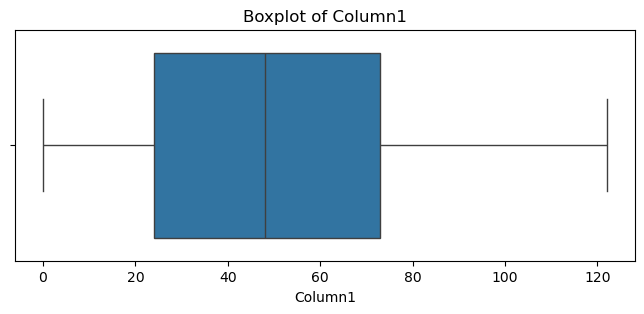

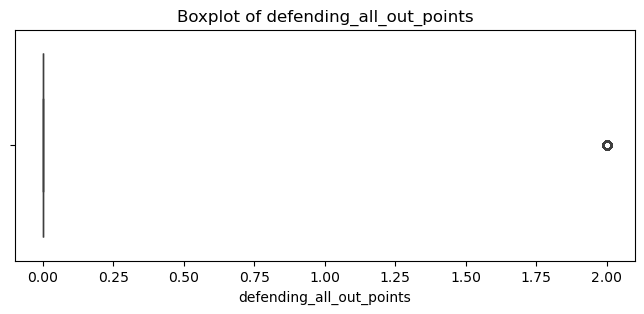

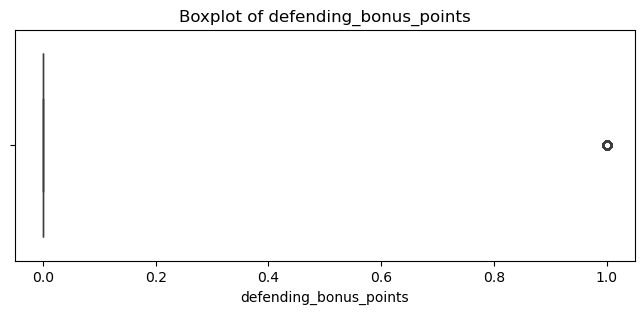

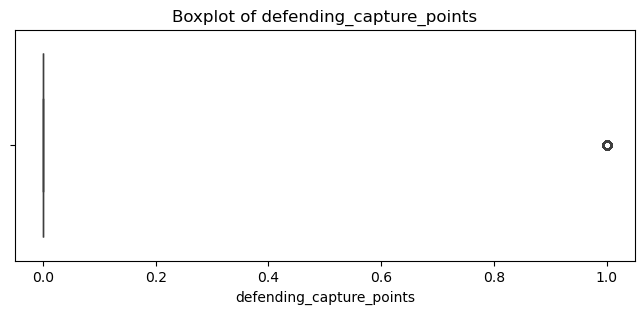

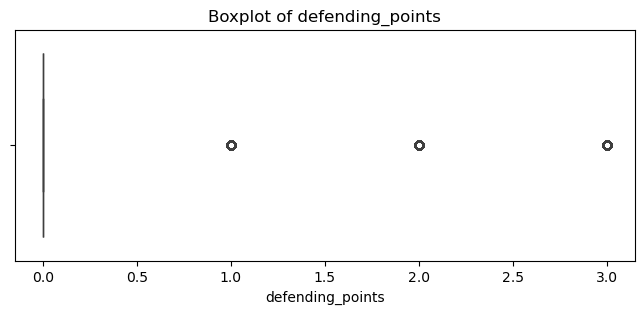

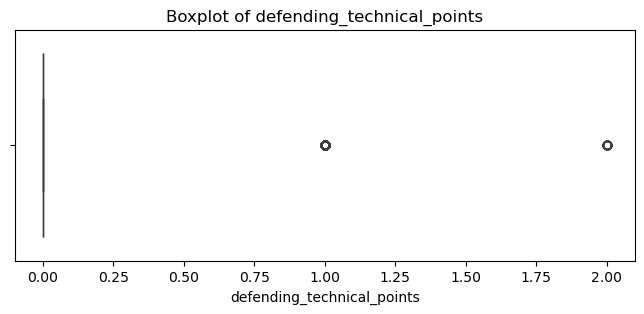

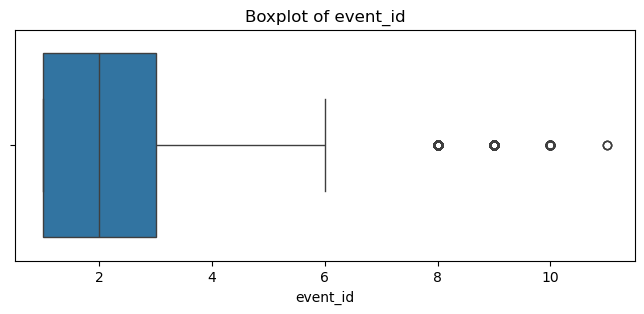

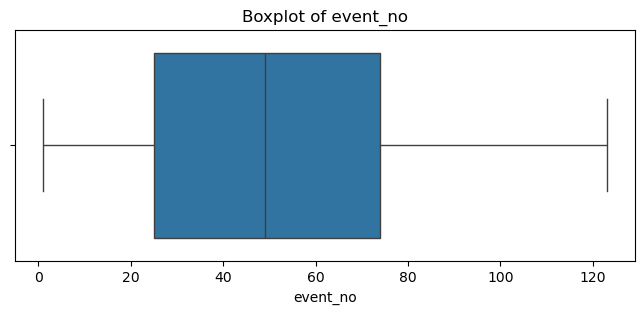

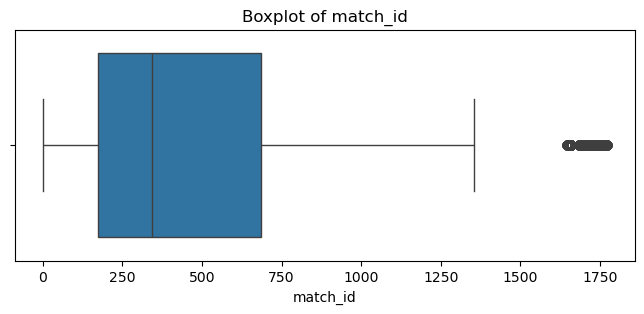

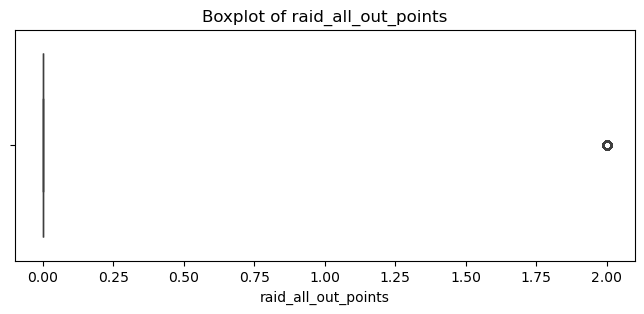

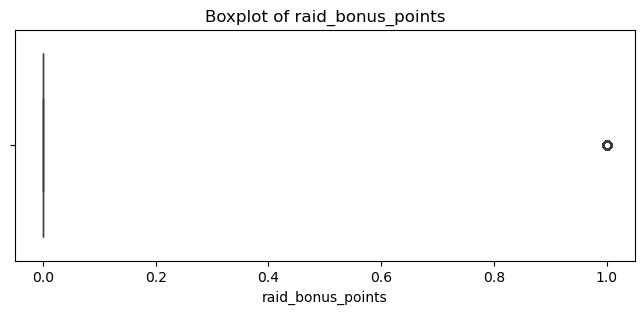

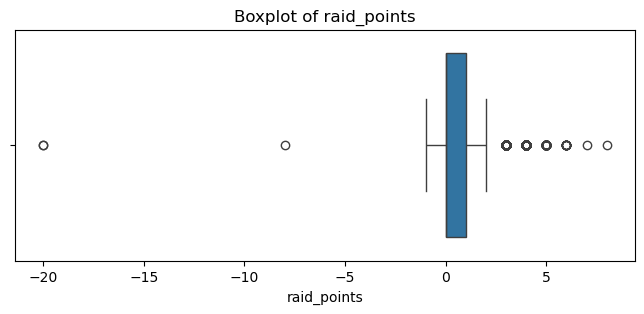

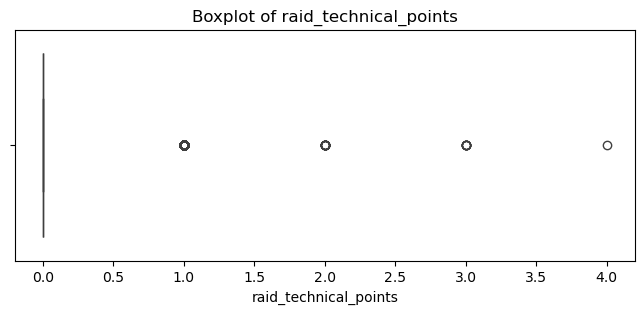

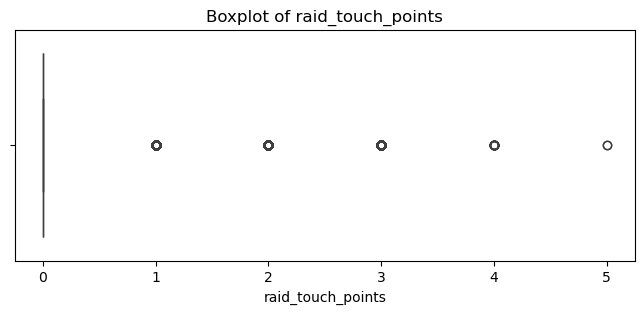

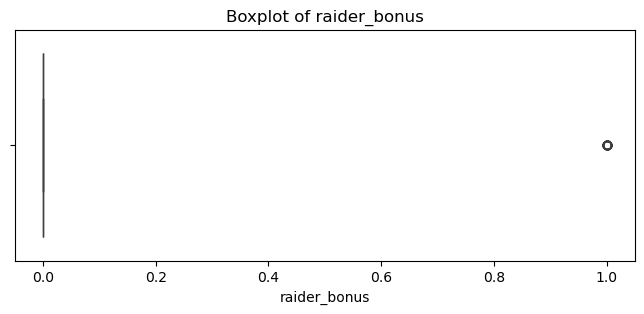

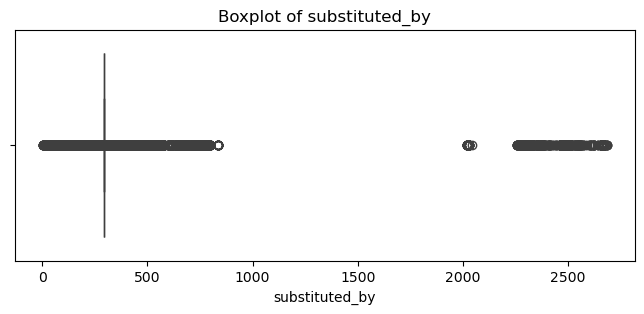

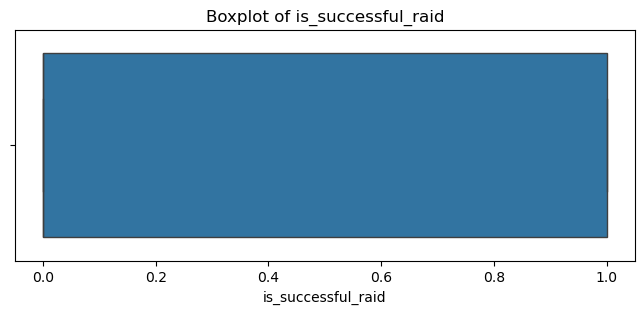

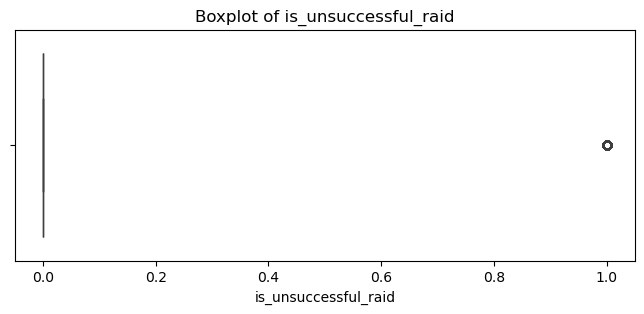

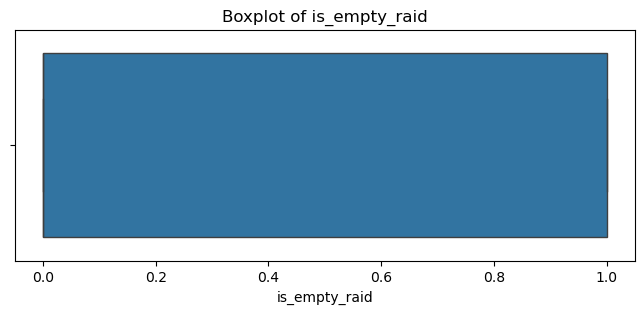

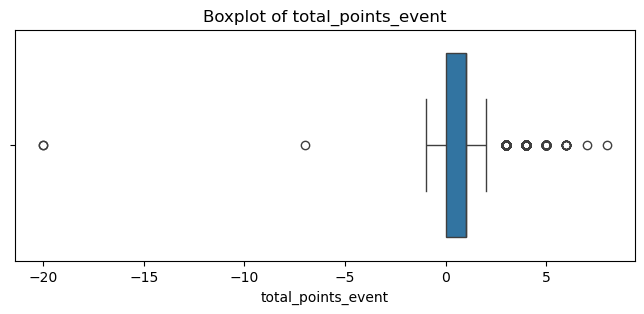

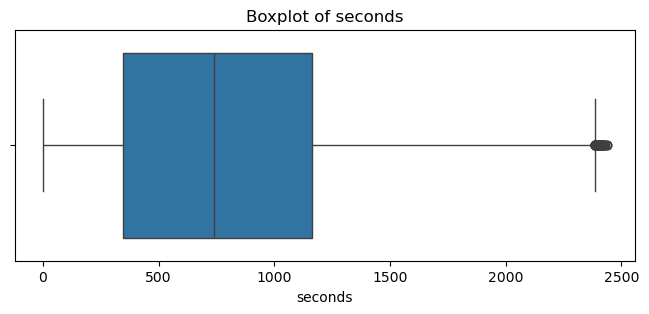

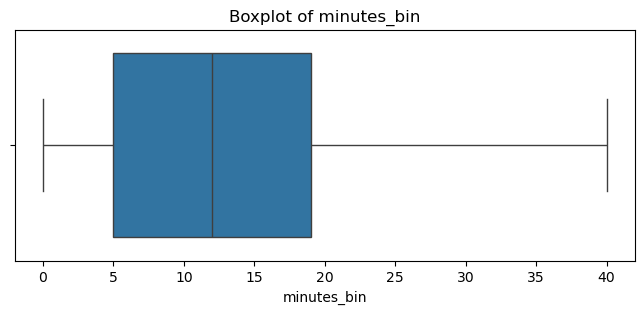

In [320]:
# Iterating to each column and look for outlier via boxplot....
for col in nums_cols:
    plt.figure(figsize = (8,3))
    sns.boxplot(x = events_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

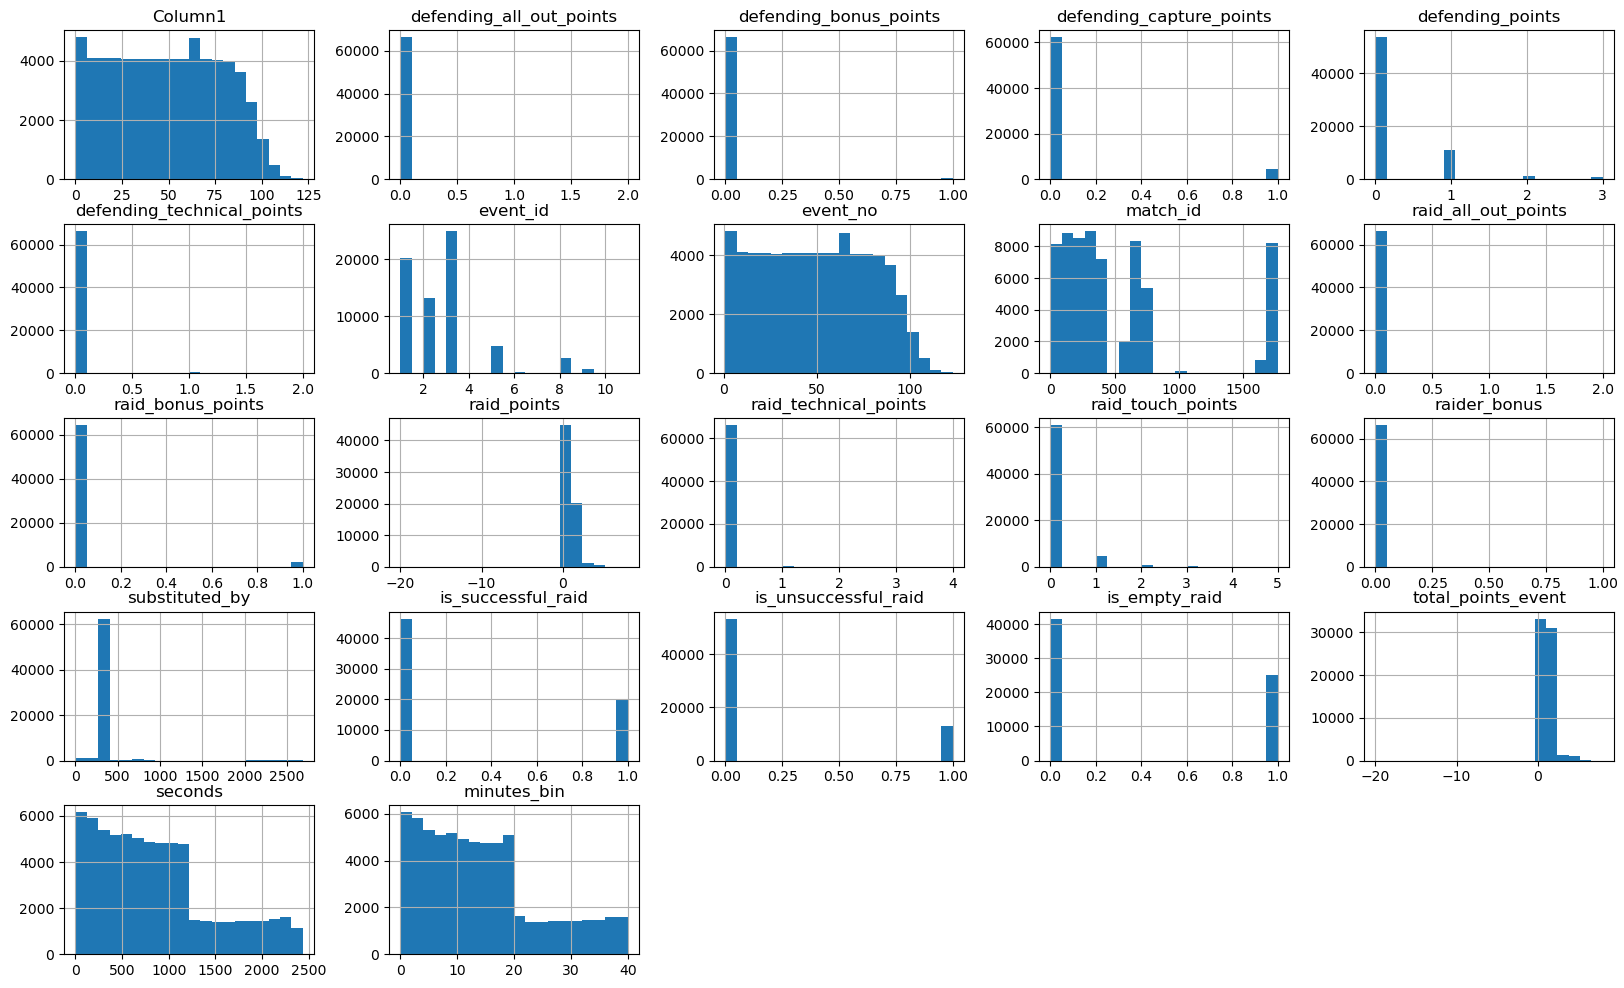

In [321]:
# Univariate
events_df.hist(bins = 20 , figsize = (20,12))
plt.show()

In [322]:
# Generalized Function to get the idea of outlier present in our dataset:
def remove_outliers_iqr(df , column , factor = 5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

In [323]:
events_df.shape

(66568, 43)

In [324]:
for col in nums_cols:
    events_df = remove_outliers_iqr(events_df , col , factor = 5)

In [325]:
events_df

,Column1,clock,defender_id,defending_all_out_points,defending_bonus_points,defending_capture_points,defending_points,defending_team_id,defending_technical_points,do_or_die,...,substituted_by,super_raid,super_tackle,team_id,is_successful_raid,is_unsuccessful_raid,is_empty_raid,total_points_event,seconds,minutes_bin
0,0,0:33,-,0.0,0.0,0.0,0.0,5.0,0.0,-,...,293.0,-,-,-,1,0,0,1.0,33,0
1,1,0:43,-,0.0,0.0,0.0,0.0,3.0,0.0,-,...,293.0,-,-,-,0,0,1,0.0,43,0
4,4,2:19,-,0.0,0.0,0.0,0.0,5.0,0.0,-,...,293.0,-,-,-,0,0,1,0.0,139,2
5,5,2:48,-,0.0,0.0,0.0,0.0,3.0,0.0,-,...,293.0,-,-,-,0,0,1,0.0,168,2
6,6,3:10,-,0.0,0.0,0.0,0.0,5.0,0.0,-,...,293.0,-,-,-,0,0,1,0.0,190,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66559,85,36:44,-,0.0,0.0,0.0,0.0,4.0,0.0,-,...,293.0,-,-,-,1,0,0,3.0,2204,36
66562,88,37:36,-,0.0,0.0,0.0,0.0,4.0,0.0,-,...,293.0,-,-,-,1,0,0,1.0,2256,37
66563,89,38:08,-,0.0,0.0,0.0,0.0,5.0,0.0,-,...,293.0,-,-,-,0,0,1,0.0,2288,38
66564,90,38:38,-,0.0,0.0,0.0,0.0,4.0,0.0,-,...,293.0,-,-,-,0,0,1,0.0,2318,38


In [326]:
events_df.shape

(41596, 43)

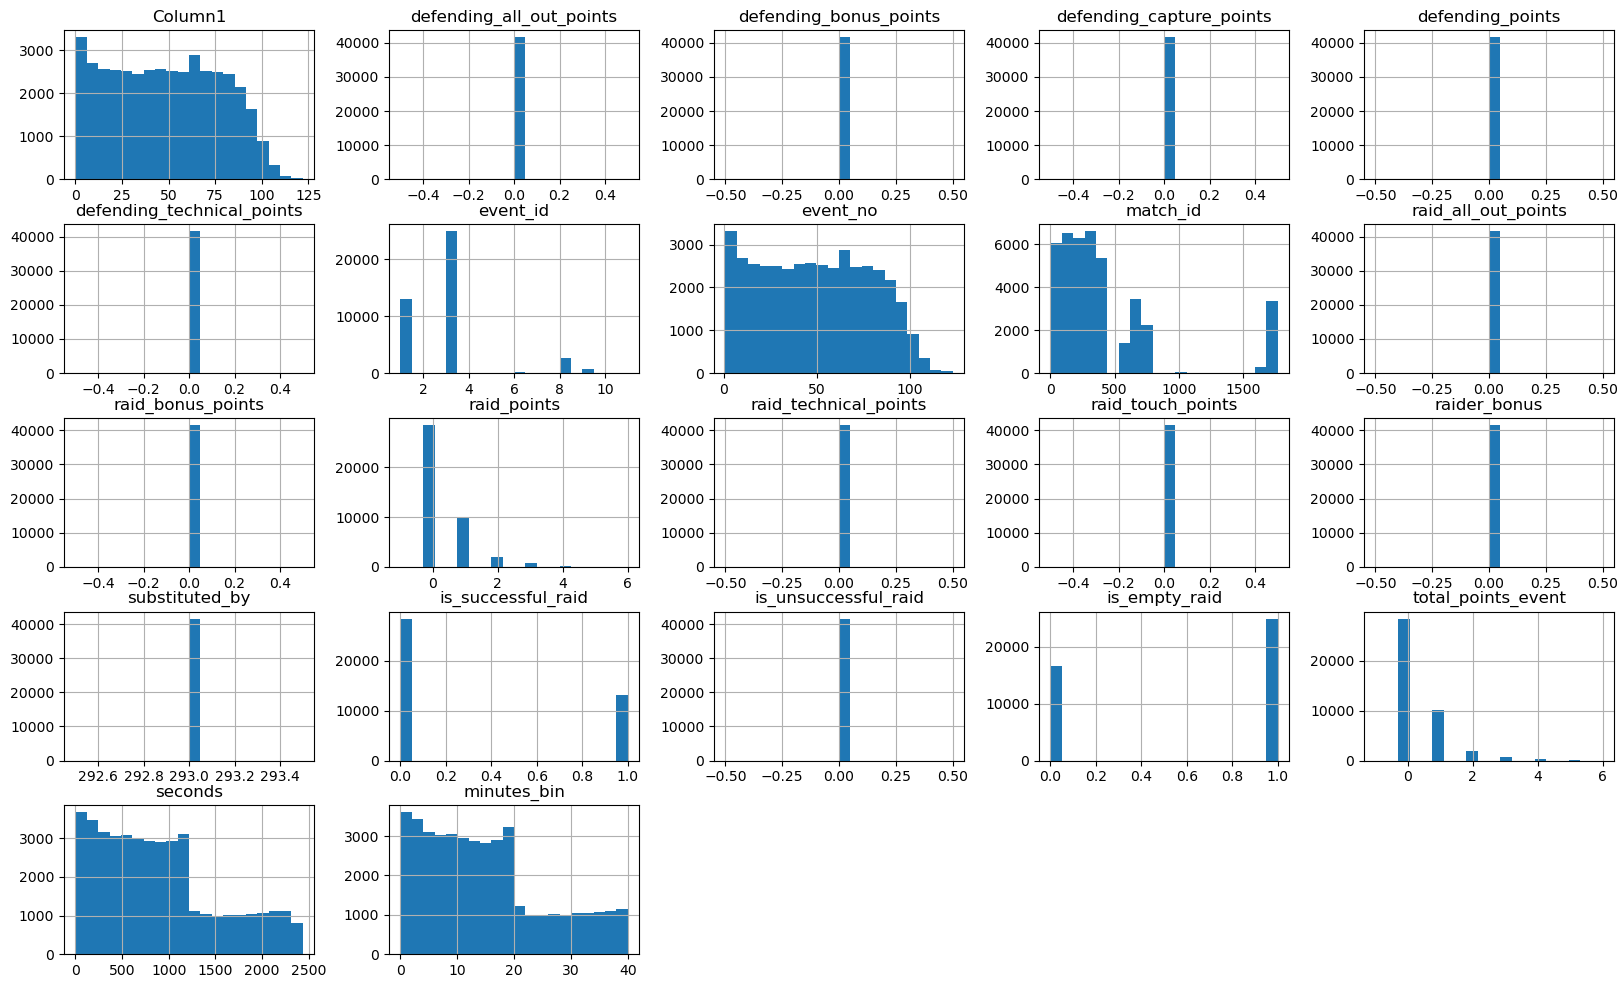

In [327]:
# Descriptive Analysis & Visualization

# Univariate
events_df.hist(bins = 20 , figsize = (20,12))
plt.show()

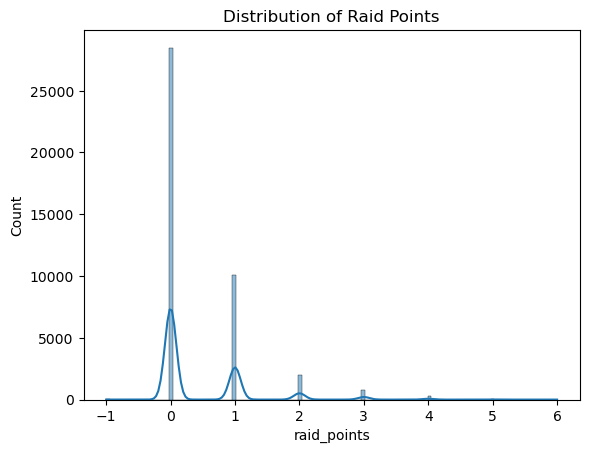

In [328]:
sns.histplot(events_df['raid_points'] , kde = True)
plt.title('Distribution of Raid Points')
plt.show()

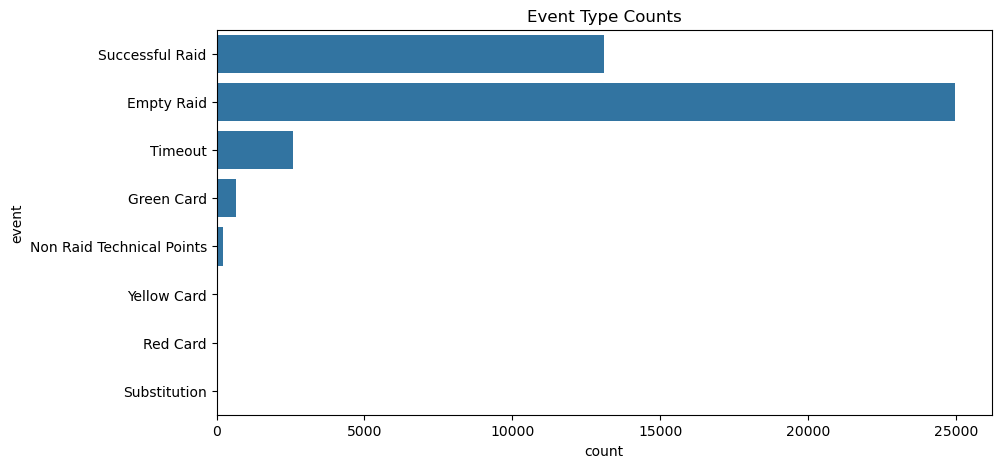

In [329]:
# Categorical Count 
plt.figure(figsize = (10,5))
sns.countplot(y = events_df['event'])
plt.title('Event Type Counts')
plt.show()

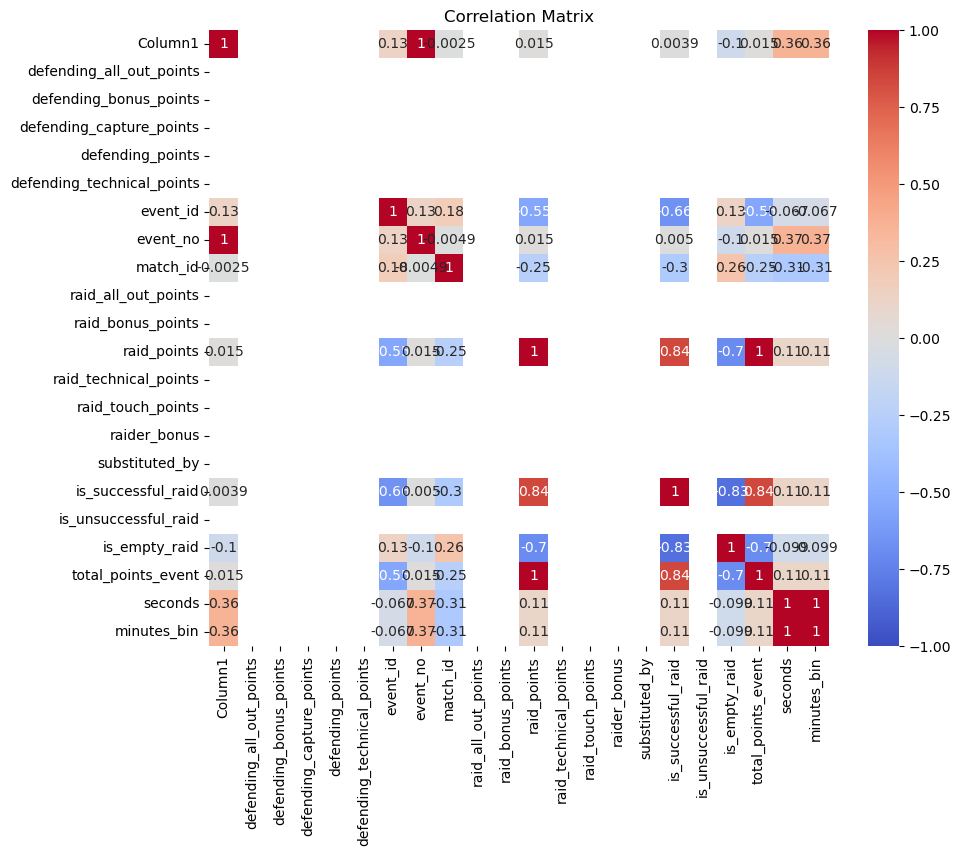

In [330]:
# HeatMap [Correlations]
corr = events_df.corr(numeric_only = True)
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', vmin=-1 , vmax = 1)
plt.title('Correlation Matrix')
plt.show()

In [331]:
# Group By & Pivot Table
# How many events did each team generate?

events_by_team = (
    events_df
    .groupby('team_id')['event']
    .count()
    .reset_index(name = 'event_count')
)
events_by_team

,team_id,event_count
0,0.0,1616
1,1.0,179
2,2.0,159
3,3.0,184
4,4.0,154
5,5.0,178
6,6.0,176
7,7.0,166
8,8.0,183
9,9.0,8


In [332]:
events_df['event'].unique()

array(['Successful Raid', 'Empty Raid', 'Timeout', 'Green Card',
       'Non Raid Technical Points', 'Yellow Card', 'Red Card',
       'Substitution'], dtype=object)

In [333]:
# Raid Success by Team
raid_events = events_df[events_df['event'].isin(['Successful Raid' , 'Empty Raid' , 'Unsuccessful Raid'])]

raid_events

,Column1,clock,defender_id,defending_all_out_points,defending_bonus_points,defending_capture_points,defending_points,defending_team_id,defending_technical_points,do_or_die,...,substituted_by,super_raid,super_tackle,team_id,is_successful_raid,is_unsuccessful_raid,is_empty_raid,total_points_event,seconds,minutes_bin
0,0,0:33,-,0.0,0.0,0.0,0.0,5.0,0.0,-,...,293.0,-,-,-,1,0,0,1.0,33,0
1,1,0:43,-,0.0,0.0,0.0,0.0,3.0,0.0,-,...,293.0,-,-,-,0,0,1,0.0,43,0
4,4,2:19,-,0.0,0.0,0.0,0.0,5.0,0.0,-,...,293.0,-,-,-,0,0,1,0.0,139,2
5,5,2:48,-,0.0,0.0,0.0,0.0,3.0,0.0,-,...,293.0,-,-,-,0,0,1,0.0,168,2
6,6,3:10,-,0.0,0.0,0.0,0.0,5.0,0.0,-,...,293.0,-,-,-,0,0,1,0.0,190,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66559,85,36:44,-,0.0,0.0,0.0,0.0,4.0,0.0,-,...,293.0,-,-,-,1,0,0,3.0,2204,36
66562,88,37:36,-,0.0,0.0,0.0,0.0,4.0,0.0,-,...,293.0,-,-,-,1,0,0,1.0,2256,37
66563,89,38:08,-,0.0,0.0,0.0,0.0,5.0,0.0,-,...,293.0,-,-,-,0,0,1,0.0,2288,38
66564,90,38:38,-,0.0,0.0,0.0,0.0,4.0,0.0,-,...,293.0,-,-,-,0,0,1,0.0,2318,38


In [334]:
raid_point = pd.pivot_table(
    raid_events,
    index = 'team_id',
    columns = 'event',
    values = 'total_points_event',
    aggfunc = 'count',
    fill_value = 0
)
raid_point

event,Empty Raid,Successful Raid
team_id,,
-,24949,13102


In [335]:
players_df

,Unnamed: 0,index,player_id,player_name,player_short_name,player_skill,player_role,player_red_card,player_yellow_card,player_green_card,...,player_tackle_points_capture_bonus,player_raids_total,player_raids_successful,player_raids_unsuccessful,player_raids_Empty,player_tackles_total,player_tackles_successful,player_tackles_unsuccessful,match_id,team_id
0,0,0,15,Sanjay Shrestha,Sanjay Shrestha,NaN,NaN,False,False,False,...,0,0,0,0,0,0,0,0,1,3
1,0,0,96,Rohit Rana,Rohit Rana,NaN,NaN,False,False,False,...,0,1,0,0,1,0,0,0,1,3
2,0,0,72,Navneet Gautam,Navneet Gautam,NaN,NaN,False,False,False,...,0,1,0,0,1,0,0,0,1,3
3,0,0,52,Jasvir Singh,Jasvir Singh,NaN,NaN,False,False,False,...,1,12,7,3,2,10,3,7,1,3
4,0,0,22,Wei Yang,Wei Yang,NaN,NaN,False,False,False,...,0,0,0,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16887,0,0,13,Seong Ryeol Kim,NaN,NaN,NaN,False,False,False,...,0,0,0,0,0,0,0,0,99,4
16888,0,0,108,Shyam Kumar Sah,NaN,NaN,NaN,False,False,False,...,0,1,0,0,1,6,3,3,99,4
16889,0,0,179,Vikas Kale,NaN,NaN,NaN,False,False,False,...,0,0,0,0,0,2,0,2,99,4
16890,0,0,180,Kedar Lal,NaN,NaN,NaN,False,False,False,...,0,10,3,2,5,0,0,0,99,4


In [336]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16892 entries, 0 to 16891
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          16892 non-null  int64  
 1   index                               16892 non-null  int64  
 2   player_id                           16892 non-null  int64  
 3   player_name                         16892 non-null  object 
 4   player_short_name                   1698 non-null   object 
 5   player_skill                        0 non-null      float64
 6   player_role                         0 non-null      float64
 7   player_red_card                     16892 non-null  bool   
 8   player_yellow_card                  16892 non-null  bool   
 9   player_green_card                   16892 non-null  bool   
 10  player_jersey                       16892 non-null  int64  
 11  player_played                       16892

In [337]:
# Top 5 players by Total Points
top_players = (
    players_df
    .groupby('player_name')['player_total_points']
    .sum()
    .sort_values(ascending = False)
    .head(5)
)
top_players

player_name
Pardeep Narwal     1125
Rahul Chaudhari    1082
Ajay Thakur         999
Rohit Kumar         702
Maninder Singh      693
Name: player_total_points, dtype: int64